# Исследование объявлений о продаже квартир

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')


In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

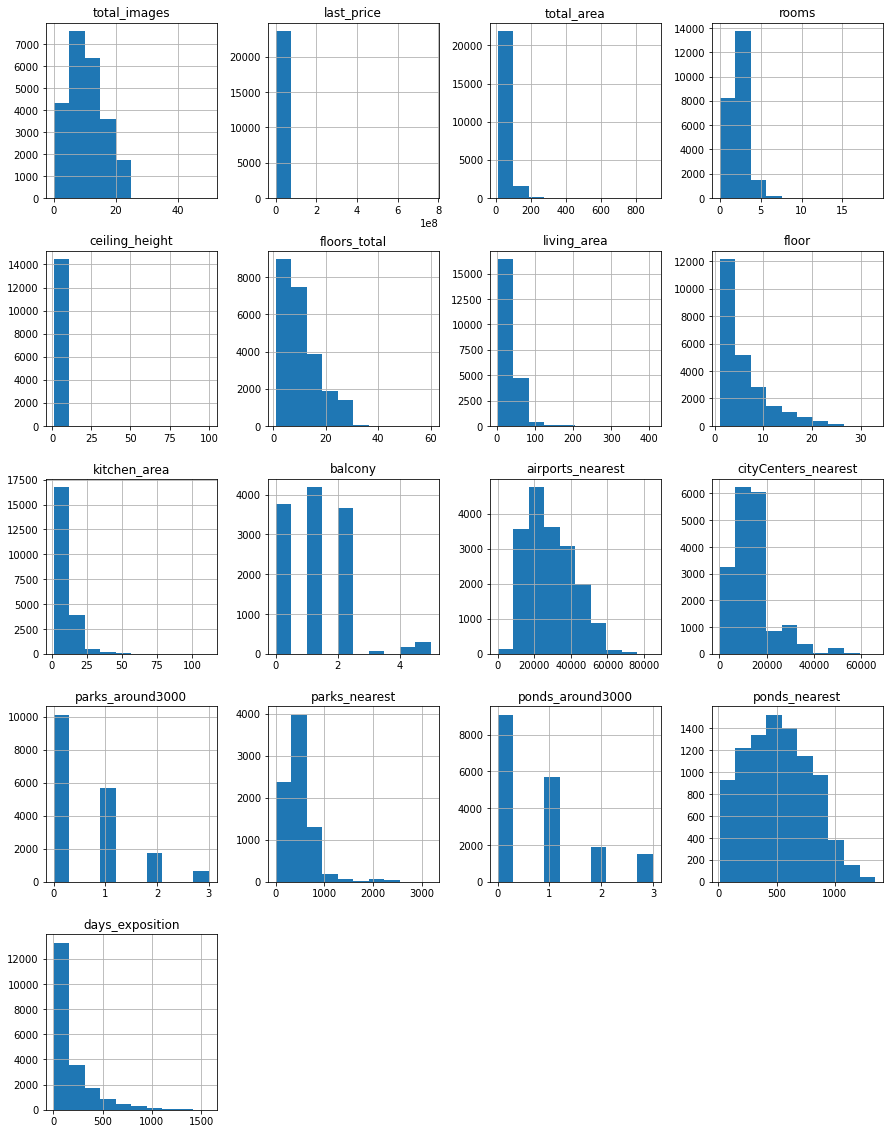

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


В ходе первичного ознакомления с данными было установлено:

1) в датафрейме есть пропуски как в столбцах с количественными переменными, так и в столбцах с категориальными переменными: их нужно по возможности устранить;

2) необходимо изменить тип данных (is_apartament и first_day_exposition)

3) название столбца cityCenters_nearest нужно привести к единому стилю;

4) по гистограммам и сводной статистике видно, что присутствуют проблемы в данных: например, в total_area и living_area есть значения 1 и 2 м2 соответственно, есть квартиры в 60-этажных зданиях (столбец floors_total), в столбце ceiling_height максимальная высота потолков - 100 метров. Нужно выявить все аномалии и выбросы и удалить их.

### Выполните предобработку данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

Столбец cityCenters_nearest привела к единому стилю.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

В столбце balcony места пропусков заменила на 0: скорее всего, если при вводе данных сведения о количестве балконов не были заполнены, то балконов нет.

In [9]:
data = data.dropna(subset=['locality_name']) 

locality_name - категориальная переменная, всего 49 пропусков, что составляет меньше 1%. 
Я решила убрать из датафрейма эти записи.

In [10]:
data['ceiling_height'].sort_values(ascending=False).head(10) 

22869   100.0
3148     32.0
22336    32.0
21377    27.5
17857    27.0
21824    27.0
10773    27.0
5246     27.0
5807     27.0
20478    27.0
Name: ceiling_height, dtype: float64

Высота потолков по стандартным размерам не превышает 4 метров. Обработаю высоту всех потолков, которые в исходных данных указаны больше или равно 14.

In [11]:
data.loc[data['ceiling_height'] >= 14.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Пропуски в столбце ceiling_height заменила медианным значением.

In [12]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'] = data['is_apartment'].fillna('False') 

Изменила тип данных is_apartment на булевое значение. 

Пропуски заменила на False: если при заполнении были оставлены пробелы, как и в случае с балконами, можно предположить, что эти квартиры не являлись апартаментами.

In [13]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.0,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,-0.0,-0.0,0.1,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
last_price,0.1,1.0,0.7,0.4,0.3,-0.0,0.6,0.0,0.0,-0.0,-0.0,0.5,0.0,-0.0,-0.2,0.2,-0.0,0.2,-0.1,0.1
total_area,0.1,0.7,1.0,0.8,0.4,-0.1,0.9,-0.0,-0.0,-0.1,-0.0,0.6,0.0,-0.0,-0.2,0.2,-0.0,0.2,-0.1,0.1
rooms,0.1,0.4,0.8,1.0,0.2,-0.2,0.8,-0.2,-0.0,-0.1,-0.1,0.3,-0.0,-0.1,-0.2,0.1,-0.1,0.1,-0.1,0.1
ceiling_height,0.0,0.3,0.4,0.2,1.0,-0.1,0.3,-0.0,-0.0,0.0,-0.0,0.3,-0.0,-0.1,-0.3,0.2,-0.1,0.2,-0.1,0.1
floors_total,0.0,-0.0,-0.1,-0.2,-0.1,1.0,-0.2,0.7,-0.0,0.1,0.1,0.2,0.2,0.1,0.0,-0.3,0.1,-0.1,0.0,-0.1
living_area,0.1,0.6,0.9,0.8,0.3,-0.2,1.0,-0.1,-0.0,-0.1,-0.0,0.4,-0.0,-0.1,-0.2,0.2,-0.1,0.1,-0.1,0.1
floor,0.0,0.0,-0.0,-0.2,-0.0,0.7,-0.1,1.0,-0.0,0.0,0.0,0.1,0.2,0.1,0.0,-0.2,0.1,-0.1,0.0,-0.0
is_apartment,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.2,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.1
studio,-0.0,-0.0,-0.1,-0.1,0.0,0.1,-0.1,0.0,0.0,1.0,-0.0,NaN,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0


Вывела матрицу корреляции. Есть зависимость между жилой площадью и количеством комнат, поэтому заполню пропуски в данных о площади жилой зоны медианным значением с учетом количества комнат в квартире.

In [14]:
for d in data['rooms'].unique():
    data.loc[(data['rooms'] == d) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == d), 'living_area'].median()    

In [15]:
print(data['parks_around3000'].isna().sum())
print(data['parks_nearest'].isna().sum())

5510
15586


In [16]:
print(data['ponds_around3000'].isna().sum())
print(data['ponds_nearest'].isna().sum())

5510
14565


В столбцах parks_nearest и pond_nearest пропущено более 50% данных, поэтому пропуски в этих данных придется оставить не изменяемыми. 

Число пропусков в parks_around_3000 совпадает с числом пропусков в ponds_around_3000 + эти столбцы, вероятнее всего, заполнялись автоматически лучше их оставить.

In [17]:
data['airports_nearest'].isna().sum()

5534

Информация о аэропорте получена картографически. Предположительно, аэропорта просто нет в месте, где продают квартиру.

Пропуски в city_centers_nearest лучше оставить без изменений. Скорее всего, пропуск означает, что квартира находится не в центре и не в городе.

Пропуски в days_exposition лучше оставить без изменений. Возможно, пропуски стоят, потому что квартира так и не была продана или технические проблемы, так как эти данные заполняются автоматически.

In [18]:
data['kitchen_area'].fillna(data['total_area'].div(data['living_area']).mul(7), inplace=True)

Здесь пропуски заменила в связке с total_area и living_area. Кухня составляет около 7% от жилой площади квартиры. total_area - площадь всей квартиры.

In [19]:
for d in data['floor'].unique():
    data.loc[(data['floor'] == d) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['floor'] == d), 'floors_total'].median()    

Есть корреляция между этажом и общим количеством этажей в доме. Для floors_total подсчитаю медиану, исходя из того, на каком этаже находится квартира.


In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') 

Изменила на тип данных — datetime.

In [22]:
data['locality_name'].value_counts().index.tolist()

['Санкт-Петербург',
 'посёлок Мурино',
 'посёлок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'посёлок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг',
 'Петергоф',
 'Сестрорецк',
 'Красное Село',
 'Кудрово',
 'деревня Новое Девяткино',
 'Сертолово',
 'Ломоносов',
 'Кириши',
 'Сланцы',
 'Волхов',
 'Тосно',
 'Кингисепп',
 'Кронштадт',
 'Никольское',
 'Коммунар',
 'Сосновый Бор',
 'Кировск',
 'Отрадное',
 'посёлок Бугры',
 'посёлок Металлострой',
 'Приозерск',
 'деревня Старая',
 'городской посёлок Янино-1',
 'Шлиссельбург',
 'Луга',
 'Тихвин',
 'поселок Бугры',
 'посёлок Стрельна',
 'посёлок Тельмана',
 'Павловск',
 'Волосово',
 'поселок Романовка',
 'Мурино',
 'поселок Мурино',
 'посёлок городского типа Сиверский',
 'Ивангород',
 'городской посёлок Новоселье',
 'городской посёлок Мга',
 'поселок городского типа имени Свердлова',
 'Сясьстрой',
 'Зеленогорск',
 'посёлок Щеглово',
 'посёлок городского типа Кузьмоловский',
 'поселок городского типа Синявино',
 'деревня Лесколово',

In [23]:
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'посёлок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'посёлок')
data['locality_name'] = data.locality_name.str.replace('посёлок городского типа', 'посёлок')
data['locality_name'] = data.locality_name.str.replace('городской посёлок', 'посёлок')

data['locality_name'].value_counts().sort_index(ascending=True).index.tolist() 


['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

В ходе предобработки данных было сделано следующее:

1) Заполнены пропуски там, где это было возможно.
Пропуски встречались как среди данных, которые заполнялись вручную, так и среди данных, которые заполнялись автоматически. Столбцы ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name содержат данные, которые заполнялись вручную, поэтому можно предположить, что в пропусках виноват человеческий фактор.
Столбцы airports_nearest, city_centers_nearest, parks_around3000, ponds_around3000, ponds_nearest заполнялись автоматически на основе картографических данных. Пропуски в этих столбцах могли быть вызвана ошибками в сборе данных: технические проблемы, ошибки в алгоритмах сбора данных или их обработке и тем же человеческим фактором (например, ошибки ввода данных операторами или неправильное использование инструментов сбора данных). Пропуски в этих столбцах были оставлены. Также были оставлены пропуски в days_exposition.
Пропуски в столбцах balcony, living_area, kitchen_area, floors_total, ceiling_height были обработаны и устранены.

2) Изменен тип данных в столбцах is_apartment и fist_day_exposition. Столбец first_day_exposition содержит данные о дате и времени: чтобы работать с ним дальше и корректно извлекать из него необходимую информацию, тип данных был изменен datetime.
Изменен был тип данных столбца is_apartment - содержит данные типа истина/ложь, это булевой тип.

3) Удалены строки с пропусками в locality_name. 

4) Выявлены и удалены неявные дубликаты в столбце locality_name.





### Добавьте в таблицу новые столбцы

In [25]:
data['price_one_square_meter'] = (data['last_price'] / data['total_area']).round(2)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,0.0,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4"
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8"
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7"
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1"
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,0.0,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0"


Добавила новый столбец - цена одного квадратного метра (price_one_square_meter), значения округлила до двух знаков посел запятой и вывела 5 строчек датафрейма, чтобы проверить.

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4",3
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8",1
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7",3
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1",4
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0",1


Добавила новый столбец (weekday) - день недели публикации объявления (0 - понедельник, 1 - вторник и так далее) и вывела 5 строчек датафрейма, чтобы проверить.

In [27]:
data['month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4",3,3
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8",1,12
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7",3,8
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1",4,7
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0",1,6


Добавила новый столбец - месяц публикации (year) и вывела 5 строчек датафрейма, чтобы проверить.

In [28]:
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,"16,028.0",1.0,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,"18,603.0",0.0,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,"13,933.0",1.0,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,"6,800.0",2.0,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,"8,098.0",2.0,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018


Добавила новый столбец - год публикации (year) и вывела 5 строчек датафрейма, чтобы проверить.

In [29]:
def floor(d):
    if d['floor'] == 1:
        return 'первый'
    if d['floor'] == d['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(floor, axis=1) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,type_floor
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,другой
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,первый
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,другой
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,2.0,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015,другой
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,другой


Добавила новый столбец (type_floors) - тип этажа квартиры (значения — «первый», «последний», «другой») и вывела 5 строчек датафрейма, чтобы проверить.

In [30]:
data['centers_nearest_km']=(data['city_centers_nearest']/1000).round(0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,type_floor,centers_nearest_km
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,другой,16.0
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,первый,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,другой,14.0
3,0,"64,900,000.0",159.0,2015-07-24,3,2.6,14.0,45.0,9,True,...,84.0,3.0,234.0,424.0,"408,176.1",4,7,2015,другой,7.0
4,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,другой,8.0


Добавила новый столбец (centers_nearest_km) - расстояние до центра города в километрах с округлением до целых числе и вывела 5 строчек датафрейма, чтобы проверить.

### Проведите исследовательский анализ данных

In [31]:
data['total_area'].describe()

count   23,650.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.7
max        900.0
Name: total_area, dtype: float64

(-10.0, 1000.0)

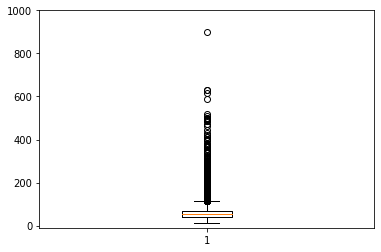

In [32]:
import matplotlib.pyplot as plt
plt.boxplot(data['total_area'])
plt.ylim(-10, 1000)

146.65


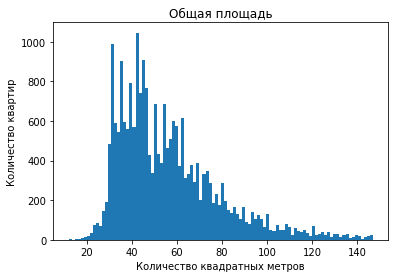

In [33]:
iqr = data['total_area'].quantile(.75) - data['living_area'].quantile(.25)

print(data['total_area'].quantile(.75) + 1.5*iqr)
data['total_area'].plot(kind='hist', bins=100, range = (12, 147), title = 'Общая площадь') 
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')
data = data.query('total_area<=150')

Максимальное значение общей площади, которое встречается в выборке, - 900 м2. Даже для четырехкомнатных квартир общая площадь не превышает обычно 130 м2. Определила верхнюю границу нормальной выборки по формуле q3+1.5qir (147), для гистограммы оставила его, для среза округлила до 150 и обновила датафрейм.

**Продаются и покупаются чаще квартиры общей площадью с 35 м2 и 45 м2.**


In [34]:
data['living_area'].describe()

count   23,088.0
mean        32.2
std         15.3
min          2.0
25%         18.2
50%         30.0
75%         41.9
max        145.0
Name: living_area, dtype: float64

(-10.0, 500.0)

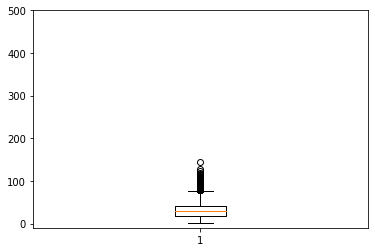

In [35]:
plt.boxplot(data['living_area'])
plt.ylim(-10, 500)

77.44999999999999


Text(0, 0.5, 'Количество квартир')

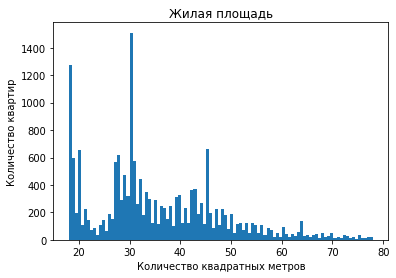

In [36]:
iqr1 = data['living_area'].quantile(.75) - data['living_area'].quantile(.25)

print(data['living_area'].quantile(.75) + 1.5*iqr1)

data['living_area'].plot(kind='hist', bins=100, range = (18, 78), title = 'Жилая площадь')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')

Минимальная стандартная жилая площадь на одного человек - 18 м2, верхнюю границу для гистограммы посчитала по формуле.


**Наиболее часто продаются квартиры с жилой площадью 18 м2, 32 м2.**

In [37]:
data['kitchen_area'].describe()

count   23,088.0
mean        10.4
std          4.9
min          1.3
25%          7.2
50%          9.5
75%         12.0
max         93.0
Name: kitchen_area, dtype: float64

(-10.0, 120.0)

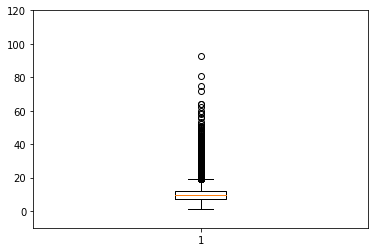

In [38]:
plt.boxplot(data['kitchen_area'])
plt.ylim(-10, 120)

19.2


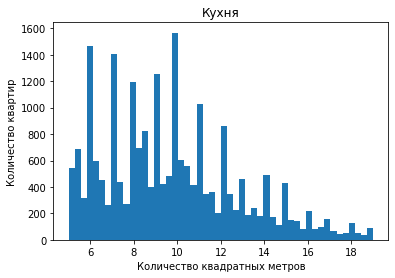

In [39]:
iqr2 = data['kitchen_area'].quantile(.75) - data['kitchen_area'].quantile(.25)

print(data['kitchen_area'].quantile(.75) + 1.5*iqr2)

data['kitchen_area'].plot(kind='hist', bins=50, range = (5, 19), title='Кухня') 
plt.xlabel('Количество квадратных метров')
plt.ylabel('Количество квартир')

data = data.query('kitchen_area <=25')

Минимальная площадь кухни, допускаемая нормативами - 5 м2.
Максимальное значение для гистограммы рассчитала по формуле.
Для датафрейма оставила значение не больше 25м2, так как такие кухни могут встречаться на рынке недвижимости, но очень редко.

**Чаще продаются квартиры с площадью кухни около 10 м2, чуть меньше - 6 и 7 м2**

In [40]:
data['last_price'].describe()

count        22,691.0
mean      5,521,296.0
std       4,133,834.6
min         430,000.0
25%       3,394,576.0
50%       4,500,000.0
75%       6,400,000.0
max     124,000,000.0
Name: last_price, dtype: float64

10908136.0


Text(0, 0.5, 'Количество квартир в миллионах')

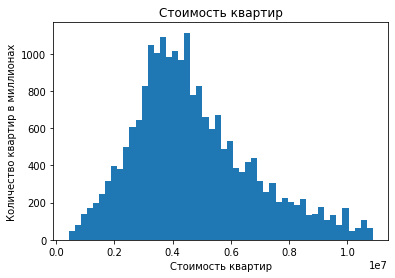

In [41]:
iqr3 = data['last_price'].quantile(.75) - data['last_price'].quantile(.25)

print(data['last_price'].quantile(.75) + 1.5*iqr3)


data['last_price'].plot(kind='hist', x='last_price', bins=50, title='Стоимость квартир', range=(430000,10875000)) 

plt.xlabel('Стоимость квартир')
plt.ylabel('Количество квартир в миллионах')


**Цены в районе 3,5-4,5 миллионов встречаются чаще остальных, однако на этом отрезке встречает много провалов**

In [42]:
data['rooms'].describe()

count   22,691.0
mean         2.0
std          0.9
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          8.0
Name: rooms, dtype: float64

(0.0, 20.0)

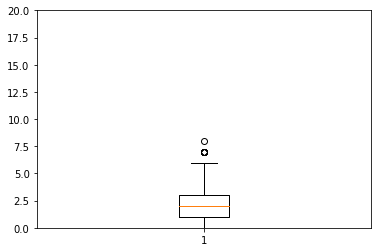

In [43]:
plt.boxplot(data['rooms'])
plt.ylim(0, 20)

In [44]:
import seaborn as sns
sns.set_theme()

6.0


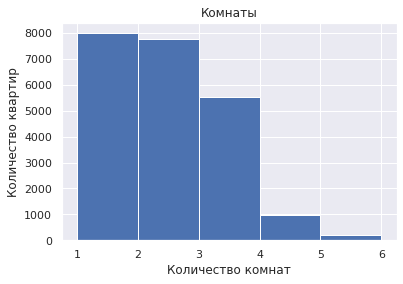

In [45]:
print(data['rooms'].quantile(.75) + 1.5 * (data['rooms'].quantile(.75) - data['rooms'].quantile(.25)))
data['rooms'].plot(kind='hist', bins=5, range = (1, 6), title='Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
data = data.query('6>=rooms>=1') 


В выборке есть квартиры с 0 комнат, я предположила, что это ошибка, а не обозначение квартиры-студии, поэтому не включила их в нормальное распределение. Максимальная граница рассчитана по формуле. Значения сохранены в датафрейме.

**Чаще продаются квартиры с 1-2 комнатами. Чем больше комнат, тем меньше предложений.**

In [46]:
data['ceiling_height'].describe()

count   22,488.0
mean         2.7
std          0.2
min          1.0
25%          2.6
50%          2.6
75%          2.7
max         10.3
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

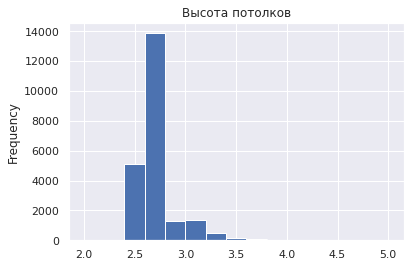

In [47]:
data['ceiling_height'].plot(kind='hist', bins=15, range = (2, 5), title = 'Высота потолков')

**Потолки в квартире находятся чаще всего на высоте 2,65 м.**

<AxesSubplot:title={'center':'Тип этажа квартиры'}, ylabel='total_images'>

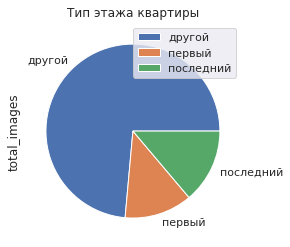

In [48]:
data.pivot_table(index = 'type_floor', values = 'total_images', aggfunc = 'count').plot(kind='pie', x='type_floor', y='total_images', title = 'Тип этажа квартиры')

**Чаще всего продаются и покупаются квартиры не на первом и не на последнем этаже. Люди меньше покупают квартиры на первом этаже: риски аварий, бытовые шумы, отсутствие лоджи и т.д. И на последнем этаже: повышенные риски при чрезвычайных ситуациях, перепады температуры и другое.**

In [49]:
data['floors_total'].describe()

count   22,488.0
mean        10.7
std          6.6
min          1.0
25%          5.0
50%          9.0
75%         16.0
max         60.0
Name: floors_total, dtype: float64

(1.0, 60.0)

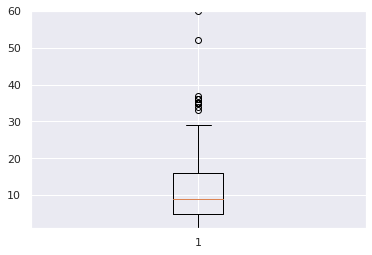

In [50]:
plt.boxplot(data['floors_total'])
plt.ylim(1, 60)

<AxesSubplot:xlabel='floors_total', ylabel='Count'>

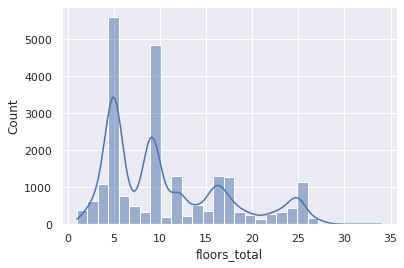

In [51]:
sns.histplot(
data=data.query('floors_total < 35'),
x='floors_total',
kde=True,
bins=29
)

Самое большое жилое здание в Санкт-Петербурге - 35 этажей. Все, что выше, я определила как аномалию, и обновила датафрейм.

**Чаще всего продаются и покупаются квартиры в пятиэтажках и девятиэтажках. Чем этажей больше, тем квартир меньше.**

In [52]:
data['city_centers_nearest'].describe()

count   17,109.0
mean    14,514.6
std      8,576.1
min        208.0
25%      9,850.0
50%     13,277.0
75%     16,461.0
max     65,968.0
Name: city_centers_nearest, dtype: float64

26377.5


Text(0, 0.5, 'Количество квартир')

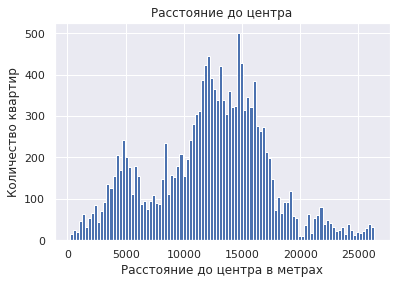

In [53]:
print(data['city_centers_nearest'].quantile(.75) + 1.5 * (data['city_centers_nearest'].quantile(.75) - data['city_centers_nearest'].quantile(.25)))
data['city_centers_nearest'].plot(kind = 'hist', bins=100, range = (208, 26369), title = 'Расстояние до центра')
plt.xlabel('Расстояние до центра в метрах')
plt.ylabel('Количество квартир')

**Чем дальше от центра, тем больше квартир на продажу: недвижимость в самом городе очень дорогая и далеко не всем доступная. В среднем, расстояние от центра Санкт-Петербурга до спальных районов может составлять от нескольких километров до десятков километров. В районе 5 км наблюдается небольшой всплеск, скорее всего, это спальные районы. В районе 13-15 км много предложений - это уже область.**

In [54]:
data['parks_nearest'].describe()

count   7,443.0
mean      492.6
std       339.6
min         1.0
25%       289.0
50%       456.0
75%       613.0
max     3,190.0
Name: parks_nearest, dtype: float64

1099.0


Text(0, 0.5, 'Количество квартир')

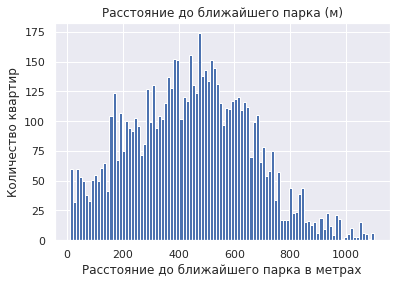

In [55]:
print(data['parks_nearest'].quantile(.75) + 1.5 * 
(data['parks_nearest'].quantile(.75) - data['parks_nearest'].quantile(.25)))
data['parks_nearest'].plot(kind='hist', bins=100, range = (10, 1102), title='Расстояние до ближайшего парка (м)')
plt.xlabel('Расстояние до ближайшего парка в метрах')
plt.ylabel('Количество квартир')


Минимальное значение - 1 метр. Есть сомнения, что существуют квартиры с настолько близким расположением от парка. Для гистрограммы я взяла минимум 10 метров. 

**Cтоит помнить, что пропуски в категории park_nearest в ходе предобработки данных не были заполнены (пропуски составляют более 50%), что может искажать результаты. Если обратить внимание на имеющиеся данные, то можно сказать, что среди квартир, где была заполнена информация о расстоянии до ближайшего парка, многие квартиры имеют парк в пешей доступности.**

In [56]:
data['days_exposition'].describe()

count   19,576.0
mean       177.6
std        216.1
min          1.0
25%         44.0
50%         94.0
75%        226.0
max      1,580.0
Name: days_exposition, dtype: float64

**Среднее - 169 дней.
Медиана - 95 дней.**

499.0


Text(0, 0.5, 'Количество квартир')

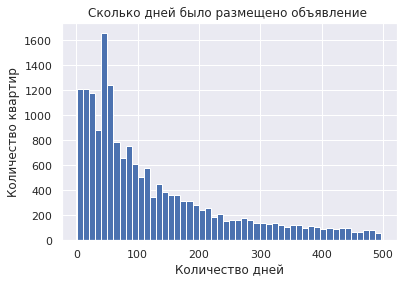

In [57]:
print(data['days_exposition'].quantile(.75) + 1.5 * 
(data['days_exposition'].quantile(.75) - data['days_exposition'].quantile(.25)))
data['days_exposition'].plot(kind='hist', bins=50, range = (1, 497), title = 'Cколько дней было размещено объявление ')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

**Обычно продажа квартиры занимает 60 дней, т.е. около двух месяцев. Быстрыми можно считать продажи, не превышающие одного месяца. Необычно долгими - от года и больше. На графике видно, что есть много квартир, которые продавались за 1 день, их тоже следует отнести к слишком быстрым продажам.**.

In [58]:
data = data.query('balcony<=3')

В данных есть квартиры на продажи с 5-ю балконами. Оставила 3 балкона.

**Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта**

In [59]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,weekday,month,year,centers_nearest_km
total_images,1.0,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.1,-0.0,0.0,0.1,-0.0
last_price,0.1,1.0,0.7,0.4,0.3,0.1,0.6,0.1,-0.0,-0.0,...,0.2,0.0,0.2,-0.1,0.1,0.8,-0.0,0.0,-0.0,-0.3
total_area,0.1,0.7,1.0,0.8,0.3,-0.0,0.9,-0.0,-0.0,-0.0,...,0.1,0.0,0.2,-0.1,0.1,0.2,-0.0,0.0,-0.1,-0.2
rooms,0.1,0.4,0.8,1.0,0.1,-0.2,0.9,-0.2,-0.0,-0.0,...,0.1,-0.0,0.1,-0.0,0.1,-0.1,-0.0,0.0,-0.0,-0.1
ceiling_height,0.0,0.3,0.3,0.1,1.0,-0.1,0.3,-0.0,-0.0,0.0,...,0.2,-0.0,0.2,-0.1,0.1,0.2,-0.0,-0.0,-0.0,-0.3
floors_total,0.0,0.1,-0.0,-0.2,-0.1,1.0,-0.2,0.7,-0.0,0.0,...,-0.2,0.1,-0.1,0.0,-0.0,0.2,0.0,0.0,0.0,0.0
living_area,0.1,0.6,0.9,0.9,0.3,-0.2,1.0,-0.1,-0.0,-0.0,...,0.1,-0.0,0.1,-0.0,0.1,0.1,-0.0,0.0,-0.1,-0.2
floor,0.0,0.1,-0.0,-0.2,-0.0,0.7,-0.1,1.0,-0.0,0.0,...,-0.2,0.1,-0.1,0.0,-0.0,0.2,0.0,0.0,0.0,0.0
is_apartment,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.1,...,-0.0,-0.0,-0.0,0.0,-0.1,0.0,0.0,0.1,0.2,-0.0
studio,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.1,1.0,...,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0


Text(0, 0.5, 'Цена в миллионах')

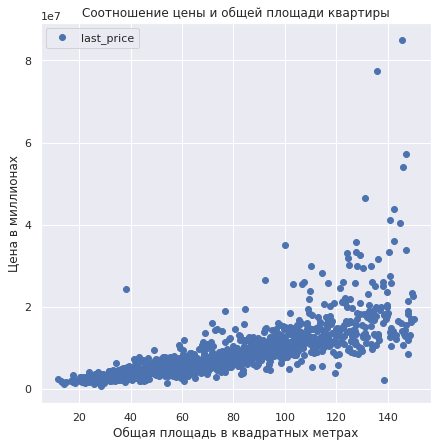

In [60]:
data.pivot_table(index='total_area', 
values='last_price', aggfunc='median').plot(grid=True, style='o', figsize=(7, 7), 
title='Соотношение цены и общей площади квартиры')
plt.xlabel('Общая площадь в квадратных метрах')
plt.ylabel('Цена в миллионах')

**Существует зависимость цены от общей площади квартиры: чем площадь больше, тем выше цена.**

Text(0, 0.5, 'Цена в миллионах')

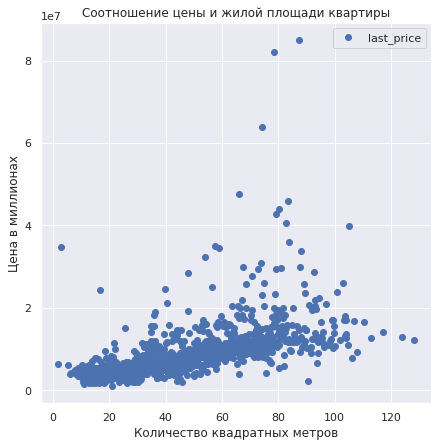

In [61]:
data.pivot_table(index='living_area', 
values='last_price', aggfunc='median').plot(grid=True, style='o', 
figsize=(7, 7), title='Соотношение цены и жилой площади квартиры')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Цена в миллионах')


**Существует зависимость цены от жилой площади квартиры: чем площадь больше, тем выше цена.**

Text(0, 0.5, 'Цена в миллионах')

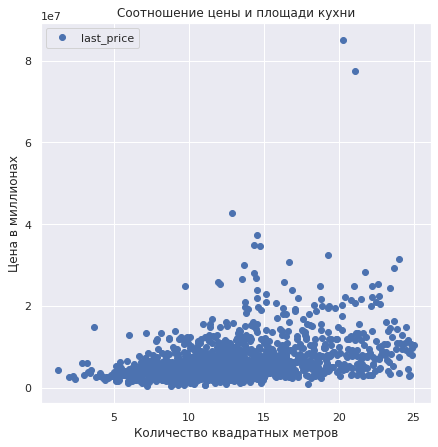

In [62]:
data.pivot_table(index='kitchen_area', 
values='last_price', aggfunc='median').plot(grid=True, style='o', 
figsize=(7, 7), title='Соотношение цены и площади кухни')
plt.xlabel('Количество квадратных метров')
plt.ylabel('Цена в миллионах')

**Существует зависимость цены от площади кухни: чем площадь больше, тем выше цена.**

Text(0, 0.5, 'Цена в миллионах')

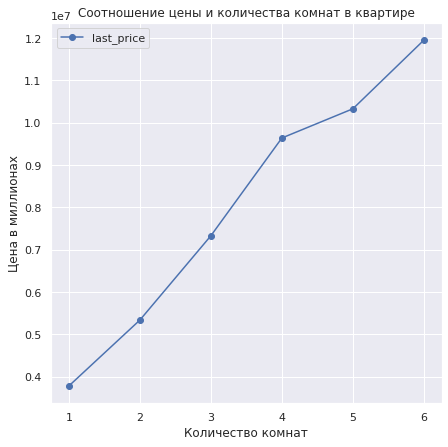

In [63]:
data.pivot_table(index='rooms', 
values='last_price').reset_index().plot(grid=True, x = 'rooms', 
style='o-', figsize=(7, 7), title='Соотношение цены и количества комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Цена в миллионах')

**Чем больше комнат в квартире, тем она дороже. Это ожидаемо.**

Text(0, 0.5, 'Цена в миллионах')

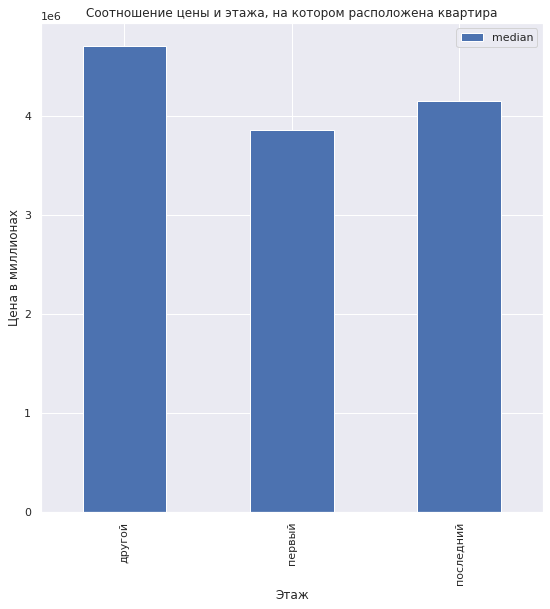

In [64]:
data.pivot_table(index = 'type_floor', values = 'last_price', 
aggfunc = ('count', 'median')).reset_index().plot(kind='bar', 
x='type_floor', y = 'median', figsize=(9,9), 
title='Соотношение цены и этажа, на котором расположена квартира')
plt.xlabel('Этаж')
plt.ylabel('Цена в миллионах')


**Ранее уже было установлено, что чаще люди продают и покупают квартиры не на первом и не на последнем этажах по ряду причин. Соответственно, цена на них будет ниже, чем на другие квартиры.**

Корреляция между днем недели публикации объявления и ценой на квартиру равна: -0.016002210102073634


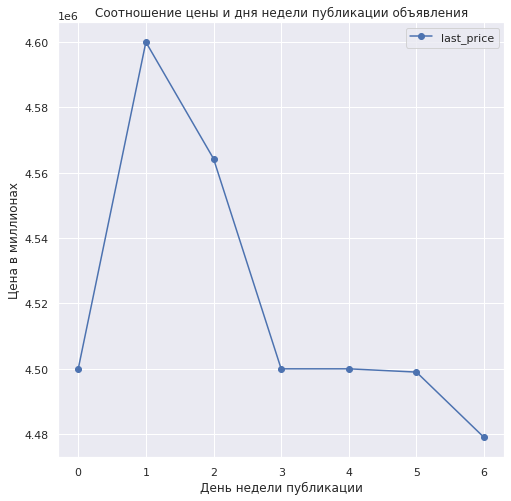

In [65]:
data.pivot_table(index='weekday', values='last_price', 
aggfunc='median').plot(grid=True, style='o-', figsize=(8, 8), 
title='Соотношение цены и дня недели публикации объявления')
plt.xlabel('День недели публикации')
plt.ylabel('Цена в миллионах')
print('Корреляция между днем недели публикации объявления и ценой на квартиру равна:', 
data['weekday'].corr(data['last_price']))

Корреляция между месяцем публикации объявления и ценой на квартиру равна: 0.007276962964473595


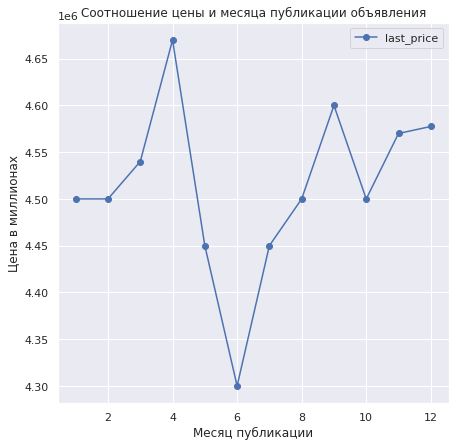

In [66]:
data.pivot_table(index='month', values='last_price', 
aggfunc='median').plot(grid=True, style='o-', figsize=(7, 7), 
title='Соотношение цены и месяца публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Цена в миллионах')
print('Корреляция между месяцем публикации объявления и ценой на квартиру равна:', 
data['month'].corr(data['last_price']))

Корреляция между годом публикации объявления и ценой на квартиру равна: -0.031413706271163584


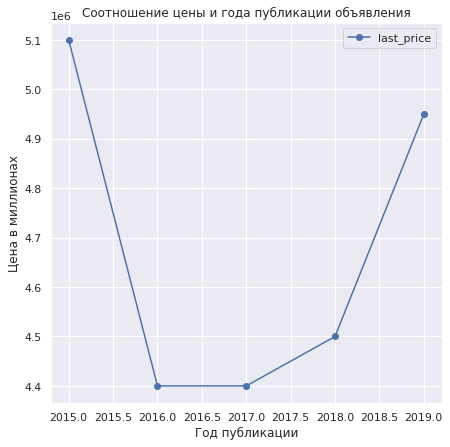

In [67]:
data.pivot_table(index='year', values='last_price', 
aggfunc='median').query('year != 2014').reset_index().plot(grid=True, 
style='o-', x = 'year', figsize=(7,7), 
title='Соотношение цены и года публикации объявления')
plt.xlabel('Год публикации')
plt.ylabel('Цена в миллионах')
print('Корреляция между годом публикации объявления и ценой на квартиру равна:', data['year'].corr(data['last_price']))

**Наблюдается определенная тенденция снижения цены на квартиру с 2015 до 2016 годов. Начиная с 2016 года цена снова растет.**

**Промежуточный вывод:** цена на квартиру в большей степени зависит от 1) общей площади квартиры, 2) жилой площади, 3) площади кухни, 4) количества комнат в квартире, 5) этажа, на котором располагается квартира. Небольшая отрицательная корреляция есть между годом и ценой: с 2015 по 2018 годы наблюдалось небольшое падение цены. Отсутствует корреляция между ценой и днем публикации, а также ценой и месяцем публикации.

**Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

,price
locality_name,
Санкт-Петербург,"103,554.9"
Пушкин,"99,431.8"
деревня Кудрово,"92,000.0"
посёлок Парголово,"91,984.4"
посёлок Мурино,"84,330.4"
посёлок Шушары,"77,049.2"
Колпино,"74,657.5"
Гатчина,"67,417.3"
Всеволожск,"65,686.3"


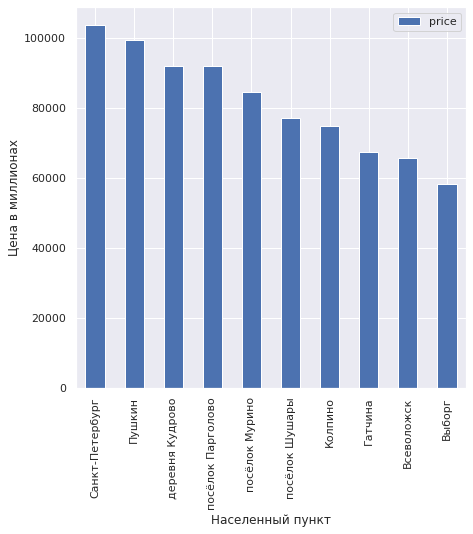

In [68]:
tp = data.pivot_table(index='locality_name', values='first_day_exposition', 
aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
tp.columns=['count']

tp['price'] = data.pivot_table(index='locality_name', 
values='price_one_square_meter', aggfunc='median')

tp_new = tp.sort_values(by = 'count', ascending=False).head(10)

tp_new.reset_index()
tp_new = tp_new.drop('count', axis=1)

tp_new.sort_values(by='price', ascending=False).plot(kind='bar', figsize=(7,7))
plt.xlabel('Населенный пункт')
plt.ylabel('Цена в миллионах')

tp_new.sort_values(by='price', ascending=False)

**Населенный пункт с самым дорогим квадратным метром - Санкт-Петербург. С самым низким - Выборг. Распределение ожидаемо: в Санкт-Петербурге самая дорогая недвижимость, чем дальше от города, тем меньше стоит квадратный метр.**

**Ранее вы посчитали расстояние до центра в километрах. 
Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость 
на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, 
в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график 
изменения средней цены для каждого километра от центра Петербурга.**

<AxesSubplot:xlabel='Расстояние до центра города в км', ylabel='Цена в миллионах'>

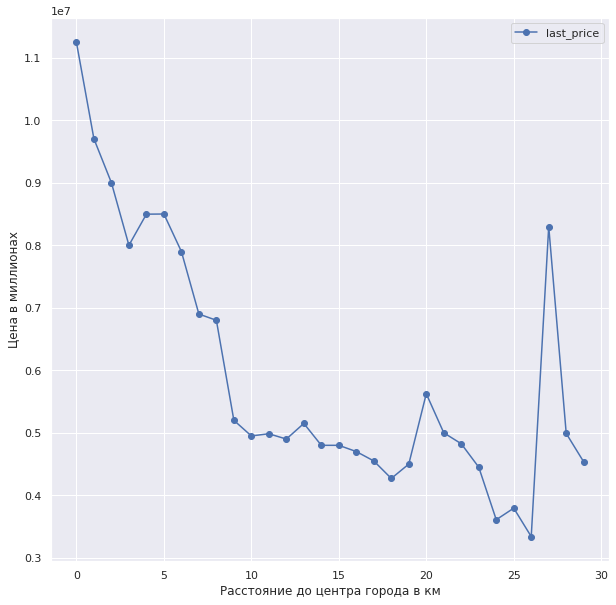

In [69]:
data.pivot_table(index=['centers_nearest_km', 'locality_name'],
values='last_price', 
aggfunc='median').query('locality_name == "Санкт-Петербург"').reset_index().plot(x='centers_nearest_km', 
grid=True, figsize=(10,10), style='o-', 
xlabel = 'Расстояние до центра города в км', ylabel = 'Цена в миллионах')

**Самое дорогое жилье - в Санкт-Петербурге. Чем дальше от центра, тем меньше стоят квартиры.**

### Напишите общий вывод

В ходе работы были выполнены следующие задачи:

1) Осуществлена предобработка данных: выявлены пропуски и неявные дубликаты. Пропуски встречались в данных, которые были заполнены людьми, и в данных, которые заполнялись автоматически. Количественные пропуски, где это было возможно, были заполнены медианой. В столбцах ponds_nearest и parks_nearest, где данные заполнялись автоматически, пропуски составляют более 50%. Было принято решение оставить эти пропуски без изменения. Пропуски в столбце airports_nearest тоже было сохранены.
Неявные дубликаты в столбце locality_name были исправлены, 49 пропусков (мене 1%) удалены.
Изменены типы данных в столбце first_day_exposition на datetime и is_apartment на bool.

2) Добавлены новые столбцы: цена одного квадратного метра (price_one_square_meter), день недели публикации (weekday), месяц публикации объявления (month), год публикации объявления (year), тип этажа квартиры (type_floor), расстояние до центра города в километрах (centers_nearest_km).

3) Проведен исследовательский анализ данных и построен ряд графиков для понимания того, какие квартиры представлены на рынке, и от каких факторов зависит рыночная цена квартир.
Чаще всего на продажу выставляются квартиры с общей площадью 35-45 м2, с жилой площадью 18 м2 и 32 м2, площадью кухни около 10 м2. Высота потолков - 2,65 м. Цены на квартиры варьируются в районе 3,4-4,5 миллионов. Много квартир с 1-2 комнатами, на которые традиционно всегда большой спрос. Квартир не на первом и не на последнем этаже больше остальных. Чем дальше от центра, тем больше квартир на продажу, много предложение в спальных районах, удаленных от центра. 
Продажа квартиры в среднем занимает около месяца. Слишком быстрыми продажами можно считать продажи, не превышающие одного месяца (несколько недель или даже дней), необычно долгими - от года и больше.

Цена на квартиру сильно зависит от общей площади квартиры, жилой площади,  площади кухни, количества комнат в квартире: чем эти показатели выше, тем и цена будет больше.
Зависимость существуется также между ценой квартиры и этажом: меньше стоимость квартир на первом и последнем этажах.
Небольшая отрицательная корреляция есть между годом и ценой: с 2015 по 2018 годы наблюдалось падение цены. 
Недвижимость дороже в Санкт-Петербурге, чем за его пределами: с удалением от города уменьшается и цена.


